In [11]:
import pandas as pd

chase_2022 = pd.read_excel(r'path_to_file\file.xls')
capitol_one_2022 = pd.read_excel(r'path_to_file\file.xls')
chase_2023 = pd.read_excel(r'path_to_file\file.xls')
capitol_one_2023 = pd.read_excel(r'path_to_file\file.xls)

In [12]:
chase_2022['Month'] = chase_2022['Posting Date'].dt.month
capitol_one_2022['Month'] = capitol_one_2022['Posted Date'].dt.month
earnings = chase_2022[chase_2022['Amount'] > 0]
earnings = earnings.groupby('Month')['Amount'].sum().round().to_frame('Earnings').reset_index()
expenses = chase_2022[chase_2022['Amount'] < 0]
expenses = pd.merge(expenses.groupby('Month')['Amount'].sum().abs().round().reset_index(),
                   capitol_one_2022.groupby('Month')['Debit'].sum().round().reset_index(), 
                    on = 'Month', how = 'outer')
expenses['Expenses'] = expenses['Amount'] + expenses['Debit']
expenses = expenses[['Month', 'Expenses']]
finances_2022 = pd.merge(earnings, expenses, on = 'Month')

chase_2023['Month'] = chase_2023['Posting Date'].dt.month
capitol_one_2023['Month'] = capitol_one_2023['Posted Date'].dt.month
earnings = chase_2023[chase_2023['Amount'] > 0]
earnings = earnings.groupby('Month')['Amount'].sum().round().to_frame('Earnings').reset_index()
expenses = chase_2023[chase_2023['Amount'] < 0]
expenses = pd.merge(expenses.groupby('Month')['Amount'].sum().abs().round().reset_index(),
                   capitol_one_2023.groupby('Month')['Debit'].sum().round().reset_index(), 
                    on = 'Month', how = 'outer')
expenses['Expenses'] = expenses['Amount'] + expenses['Debit']
expenses = expenses[['Month', 'Expenses']]
finances_2023 = pd.merge(earnings, expenses, on = 'Month')
finances_2023 = finances_2023.drop(finances_2023.index[11])

display(finances_2022)
display(finances_2023)

,Month,Earnings,Expenses
0,1,1396.0,864.0
1,2,1470.0,1048.0
2,3,1259.0,895.0
3,4,1548.0,1127.0
4,5,1654.0,2378.0
5,6,4051.0,1673.0
6,7,3030.0,1720.0
7,8,2004.0,2009.0
8,9,2191.0,1388.0
9,10,2477.0,1842.0


,Month,Earnings,Expenses
0,1,4040.0,3635.0
1,2,2099.0,1863.0
2,3,1901.0,1206.0
3,4,2221.0,2468.0
4,5,1956.0,2817.0
5,6,3821.0,3881.0
6,7,2053.0,2338.0
7,8,2069.0,3142.0
8,9,5011.0,3175.0
9,10,2710.0,3266.0


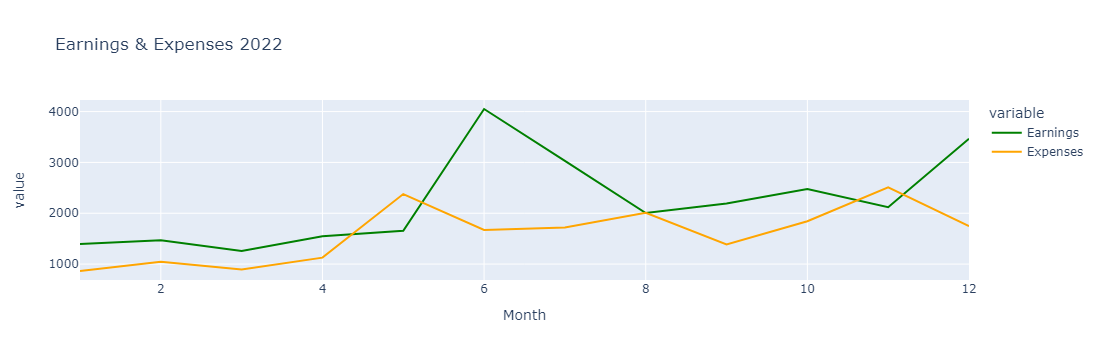

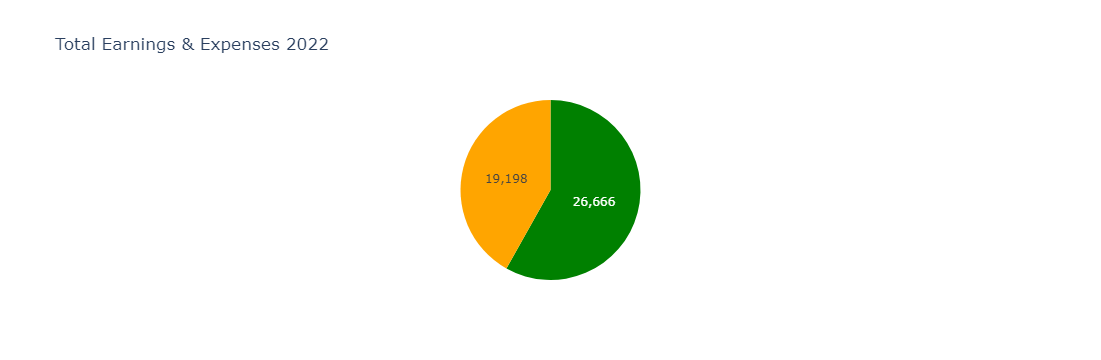

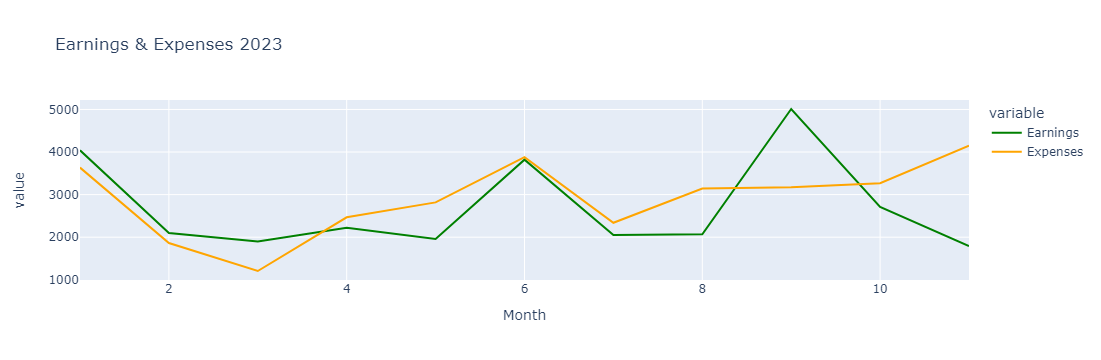

In [13]:
import plotly.express as px

fig_2022 = px.line(finances_2022, x = 'Month', y = ['Earnings', 'Expenses'],
                  title = 'Earnings & Expenses 2022',
                  color_discrete_sequence = ['green', 'orange'])

values = finances_2022['Earnings'].sum(), finances_2022['Expenses'].sum()
fig_total_2022 = px.pie(labels = ['Earnings', 'Expenses'], values = values,
                       title = 'Total Earnings & Expenses 2022')
fig_total_2022.update_traces(marker = dict(colors = ['green', 'orange']),
                            textinfo = 'value')

fig_2023 = px.line(finances_2023, x = 'Month', y = ['Earnings', 'Expenses'],
                  title = 'Earnings & Expenses 2023',
                  color_discrete_sequence = ['green', 'orange'])

fig_2022.show()
fig_total_2022.show()
fig_2023.show()